In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import gzip

# Form our test and train data
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import models 
from tensorflow.keras import layers 
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
#
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
# 
from collections import defaultdict


In [79]:
def MLP_Create(nhidden1,  nhidden_in = 0,  nHiddenMoreLayers = 0, DropOut = False ):
    # Stop criteria will be a string ; either 'val_loss' or 'val_accuracy'
    nout = 10; #number of output nodes
#     SavePath = '1layer_nh' + str(nhidden) + '_LR_'+ str(lr)+ '_SC_' + StopCriteria + '_batch_' + str(batchnum) +'_OPT_' + optimization +'.h5'
    network = models.Sequential()
    network.add(layers.Dense(nhidden1,activation='sigmoid',input_shape=(28*28,)))
    if DropOut == True: 
        network.add(layers.Dropout(.2))
    if nHiddenMoreLayers >0 :
        for hiddenLayer in range(nHiddenMoreLayers): 
            network.add(layers.Dense(nhidden_in, activation = 'sigmoid'))
    network.add(layers.Dense(nout, activation = 'softmax'))
    # Optimizer definition
    if optimization == 'adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif optimization == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    elif optimization == 'RMSProp':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    elif optimization == 'Adadelta':
        opt = keras.optimizers.Adadelta(learning_rate=lr)
    elif optimization == 'Adagrad':
        opt = keras.optimizers.Adagrad(learning_rate=lr)
    elif optimization == 'Adamax':
        opt = keras.optimizers.Adamax( learning_rate=lr)

    return  network

In [51]:
### batchnum, epochs, StopCriteria, optimization,
def Fit_network(network, SavePath , epochs = 1000, batnum = 128, StopCriteria = 'val_loss', optimization = 'adam', lr =.001, loss='categorical_crossentropy',verbose = 1):
    # Optimizer definition
    if optimization == 'adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    elif optimization == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    elif optimization == 'RMSProp':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    elif optimization == 'Adadelta':
        opt = keras.optimizers.Adadelta(learning_rate=lr)
    elif optimization == 'Adagrad':
        opt = keras.optimizers.Adagrad(learning_rate=lr)
    elif optimization == 'Adamax':
        opt = keras.optimizers.Adamax( learning_rate=lr)
# 
#     SavePath = str() + str(nhidden) + '_LR_'+ str(lr)+ '_SC_' + StopCriteria + '_batch_' + str(batchnum) +'_OPT_' + optimization +'.h5'
    network.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
#     network.save_weights('model_init.h5')
    callbacks = [EarlyStopping(monitor=StopCriteria, patience=20),
             ModelCheckpoint(filepath=SavePath, monitor=StopCriteria, save_best_only=True)]
    history = network.fit(X_Train,Y_Train_oneHot,
                      epochs=epochs,
                      batch_size=batchnum,
                      callbacks=callbacks, # Early stopping
                      validation_data=(X_Val,Y_Val_oneHot),
                         verbose = verbose)
    return history

In [52]:
################ LOAD THE DATA ####################

In [53]:
# This is the notebook where I load the data 
f_train_im = gzip.open('train-images-idx3-ubyte.gz','r')
f_train_lab = gzip.open('train-labels-idx1-ubyte.gz','r')
f_test_im = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_test_lab = gzip.open('t10k-labels-idx1-ubyte.gz','r')
image_size = 28
lab_size = 1
n_train = 60000
n_test = 10000
f_train_im.read(16)
f_train_lab.read(8)
f_test_im.read(16)
f_test_lab.read(8)
buf_tr_im = f_train_im.read(image_size * image_size * n_train)
buf_tr_lab = f_train_lab.read(lab_size * n_train)
buf_test_im = f_test_im.read(image_size * image_size * n_test)
buf_test_lab = f_test_lab.read(lab_size * n_train)
train_im = np.frombuffer(buf_tr_im, dtype=np.uint8).astype(np.float32)
train_im = train_im.reshape(n_train, image_size, image_size, 1)
test_im = np.frombuffer(buf_test_im, dtype=np.uint8).astype(np.float32)
test_im = test_im.reshape(n_test, image_size, image_size, 1)
train_labels = np.frombuffer(buf_tr_lab, dtype=np.uint8).astype(np.int64)
train_labels = train_labels.reshape(n_train,1)
test_labels = np.frombuffer(buf_test_lab, dtype=np.uint8).astype(np.int64)
test_labels = test_labels.reshape(n_test,1)
####### PROCESS THE DATA 
# Data Processing
#scaling 
# reshape the data to be able to be scaled 
Train_Im_Reshaped = train_im.reshape(train_im.shape[0],28*28)
Test_Im_Reshaped = test_im.reshape(test_im.shape[0],28*28)
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(Train_Im_Reshaped)
Train_Im_Scaled = scl.transform(Train_Im_Reshaped)
XTest = scl.transform(Test_Im_Reshaped)
#reshape data back to images 
# Train_Im_2d_np = Train_Im_Scaled.reshape(Train_Im_Scaled.shape[0], 28,28,1)
# Test_Im_2d_np  = Test_Im_Scaled.reshape(Test_Im_Scaled.shape[0],28,28,1)
YTrainAll_oneHot = to_categorical(train_labels )
YTest_oneHot = to_categorical(test_labels)
X_Train,X_Val,Y_Train_oneHot,Y_Val_oneHot = train_test_split(Train_Im_Scaled,YTrainAll_oneHot, test_size=0.1, random_state=42, shuffle = True)


In [54]:
list(range(1))

[0]

In [65]:
# choose that the number of hidden nodes = 50 
N_MoreHL_Arr = np.array([0,1,2,3,4]) # These are in addition to the one original hidden layer  so first index corresponds to 1 layer, 2 layers, 3 layers and so on
nh  = 50 ; 
# make a dictionary to store 
npoints = len(N_MoreHL_Arr)
# I think the best way to store the results would be in a dictionary
d_layers = defaultdict(lambda: "Not Present") 
d_layers["train_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["train_loss_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_loss_arr"] = defaultdict(lambda: "Not Present")
# make accuracy and loss list 
test_acc_opt = np.zeros(npoints)
test_loss_opt = np.zeros(npoints)
## for each idex in that array 
for nlayers in N_MoreHL_Arr: 
    ### Create the network 
    key = str(nlayers)
    print('number of hidden layers = '+str(nlayers+1))
    SavePath = 'keras_'+ str(nlayers+1)+'_HL_' + str(nh)+'_HN.h5'
    net = MLP_Create(nh,   nh, nlayers )
    ### Fit 
    History = Fit_network(network = net,SavePath = SavePath,verbose = 0)
    d_layers["train_acc_arr"][key] = History.history['acc']
    d_layers["train_loss_arr"][key]  = History.history['loss']
    d_layers["val_acc_arr"][key] = History.history['val_acc']
    d_layers["val_loss_arr"][key] = History.history['val_loss']
    # test the network on the testing data
    #trained network path 
#     NetworkPath = 'Model_LR_'+str(lr)+'nh_' + str(nhidden) + '_SC_' + StopCriteria + '_batch_' + str(batchnum)+'.h5'
#     NetworkPath = '1layer_nh' + str(nhidden) + '_LR_'+ str(lr)+ '_SC_' + StopCriteria + '_batch_' + str(batchnum)+'_OPT_'+ optimization+'.h5'
    trained_network = load_model(SavePath)
    # Use the testing data 
    # Get the overall performance for the test sample
    test_loss, test_acc = trained_network.evaluate(XTest,YTest_oneHot)
    # save the accuracy and the loss 
    test_acc_opt[nlayers] = test_acc
    test_loss_opt[nlayers] = test_loss
    

number of hidden layers = 1
10000/10000 [==============================] - 1s 56us/sample - loss: 0.3404 - acc: 0.8779
number of hidden layers = 2
10000/10000 [==============================] - 1s 98us/sample - loss: 0.3436 - acc: 0.8801
number of hidden layers = 3
10000/10000 [==============================] - 1s 66us/sample - loss: 0.3449 - acc: 0.8793
number of hidden layers = 4
10000/10000 [==============================] - 1s 85us/sample - loss: 0.3731 - acc: 0.8716
number of hidden layers = 5
10000/10000 [==============================] - 1s 85us/sample - loss: 0.3705 - acc: 0.8745


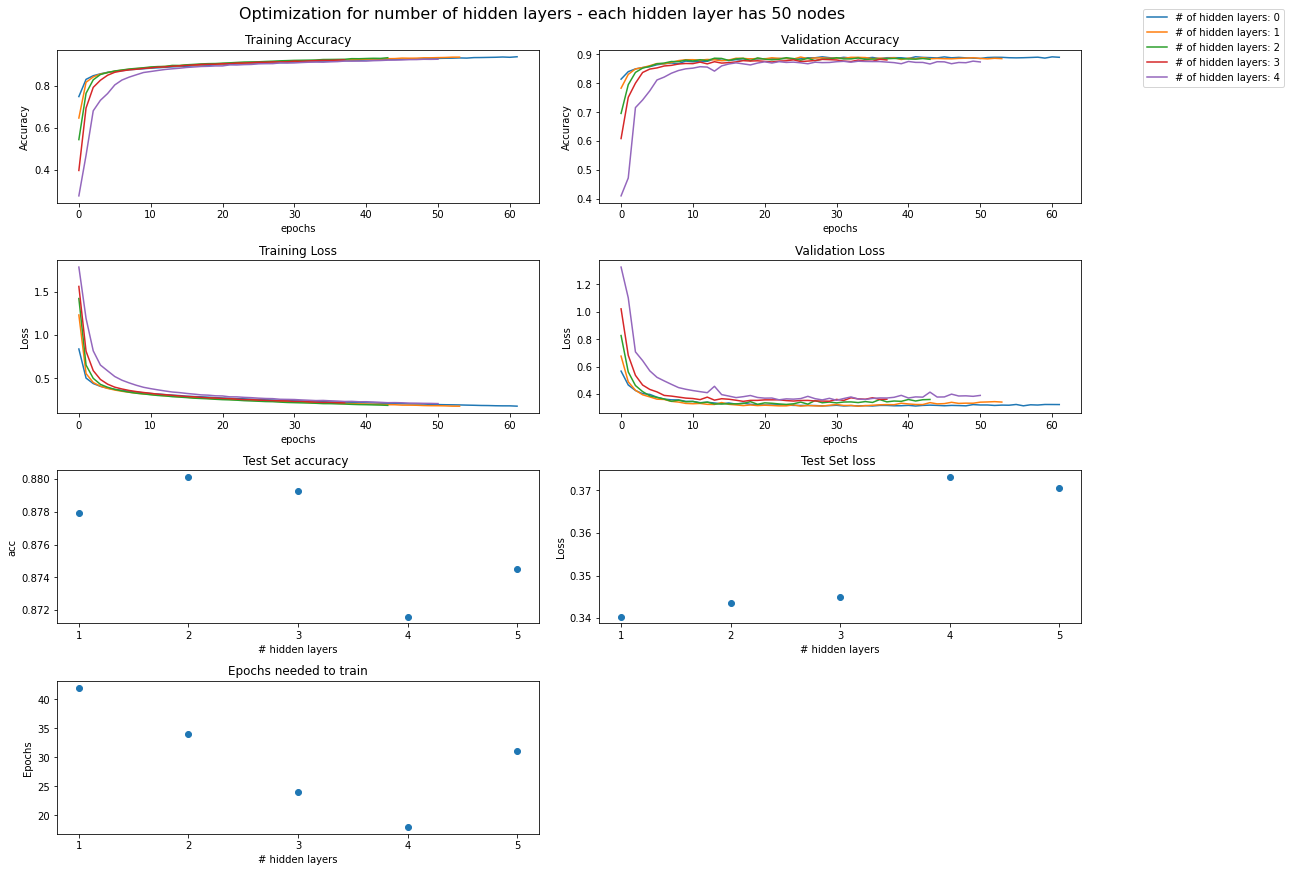

In [67]:
nepochs_arr = np.zeros(npoints)
fig, axs = plt.subplots(4, 2,figsize=(15,12), constrained_layout = True)
# fig.tight_layout()
# axs[0, 0].plot(x, y)
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Validation Accuracy')
axs[1, 0].set_title('Training Loss')
axs[1, 1].set_title('Validation Loss')
axs[2, 0].set_title('Test Set accuracy ')
axs[2, 1].set_title('Test Set loss ')
axs[3,0].set_title('Epochs needed to train')
a = np.arange(npoints)
for i in range(npoints):
#     lr = LR_array[i]
    key = str(N_MoreHL_Arr[i])
    Array1 = d_layers["train_acc_arr"][key]
    Array2 = d_layers["val_acc_arr"][key]
    Array3 = d_layers["train_loss_arr"][key]
    Array4 = d_layers["val_loss_arr"][key]
    nepochs_trained = len(Array1)
    nepochs_arr[i] = nepochs_trained - 20;
    axs[0, 0].plot(Array1 )
    axs[0, 1].plot(Array2)
    axs[1,0].plot(Array3)
    axs[1,1].plot(Array4, label ='# of hidden layers: '+ key)
    axs[0, 0].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[0, 1].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[1, 0].set(xlabel='epochs', ylabel = 'Loss')
    axs[1, 1].set(xlabel='epochs', ylabel = 'Loss')
axs[2,0].scatter(a, test_acc_opt)
axs[2,1].scatter(a, test_loss_opt)
axs[2, 0].set(xlabel='# hidden layers', ylabel = 'acc')
axs[2, 1].set(xlabel='# hidden layers', ylabel = 'Loss')
axs[2, 1].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 1].xaxis.set_ticklabels(N_MoreHL_Arr +1) # change the ticks' names to x
axs[2, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 0].xaxis.set_ticklabels(N_MoreHL_Arr +1) # change the ticks' names to x
axs[3,0].scatter(a, nepochs_arr )
axs[3, 0].set(xlabel='# hidden layers', ylabel = 'Epochs')
axs[3, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[3, 0].xaxis.set_ticklabels(N_MoreHL_Arr +1) # change the ticks' names to x
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Optimization for number of hidden layers - each hidden layer has 50 nodes ', fontsize=16)
axs[-1, -1].axis('off')
plt.show()

In [68]:
# choose that the number of hidden nodes = 50 
N_MoreHL_Arr = [0,1,2,3,4] # These are in addition to the one original hidden layer  so first index corresponds to 1 layer, 2 layers, 3 layers and so on
nh  = 160 ; 
# make a dictionary to store 
npoints = len(N_MoreHL_Arr)
# I think the best way to store the results would be in a dictionary
d_layers = defaultdict(lambda: "Not Present") 
d_layers["train_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["train_loss_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_loss_arr"] = defaultdict(lambda: "Not Present")
# make accuracy and loss list 
test_acc_opt = np.zeros(npoints)
test_loss_opt = np.zeros(npoints)
## for each idex in that array 
for nlayers in N_MoreHL_Arr: 
    ### Create the network 
    key = str(nlayers)
    print('number of hidden layers = '+str(nlayers+1))
    SavePath = 'keras_'+ str(nlayers+1)+'_HL_' + str(nh)+'_HN.h5'
    net = MLP_Create(nh,   nh, nlayers )
    ### Fit 
    History = Fit_network(network = net,SavePath = SavePath,verbose = 0)
    d_layers["train_acc_arr"][key] = History.history['acc']
    d_layers["train_loss_arr"][key]  = History.history['loss']
    d_layers["val_acc_arr"][key] = History.history['val_acc']
    d_layers["val_loss_arr"][key] = History.history['val_loss']
    # test the network on the testing data
    trained_network = load_model(SavePath)
    # Use the testing data 
    test_loss, test_acc = trained_network.evaluate(XTest,YTest_oneHot)
    # save the accuracy and the loss 
    test_acc_opt[nlayers] = test_acc
    test_loss_opt[nlayers] = test_loss
    

number of hidden layers = 1
10000/10000 [==============================] - 1s 82us/sample - loss: 0.3161 - acc: 0.8893
number of hidden layers = 2
10000/10000 [==============================] - 1s 93us/sample - loss: 0.3239 - acc: 0.8847
number of hidden layers = 3
10000/10000 [==============================] - 1s 106us/sample - loss: 0.3319 - acc: 0.8858
number of hidden layers = 4
10000/10000 [==============================] - 1s 120us/sample - loss: 0.3328 - acc: 0.8837
number of hidden layers = 5
10000/10000 [==============================] - 1s 125us/sample - loss: 0.3577 - acc: 0.8809


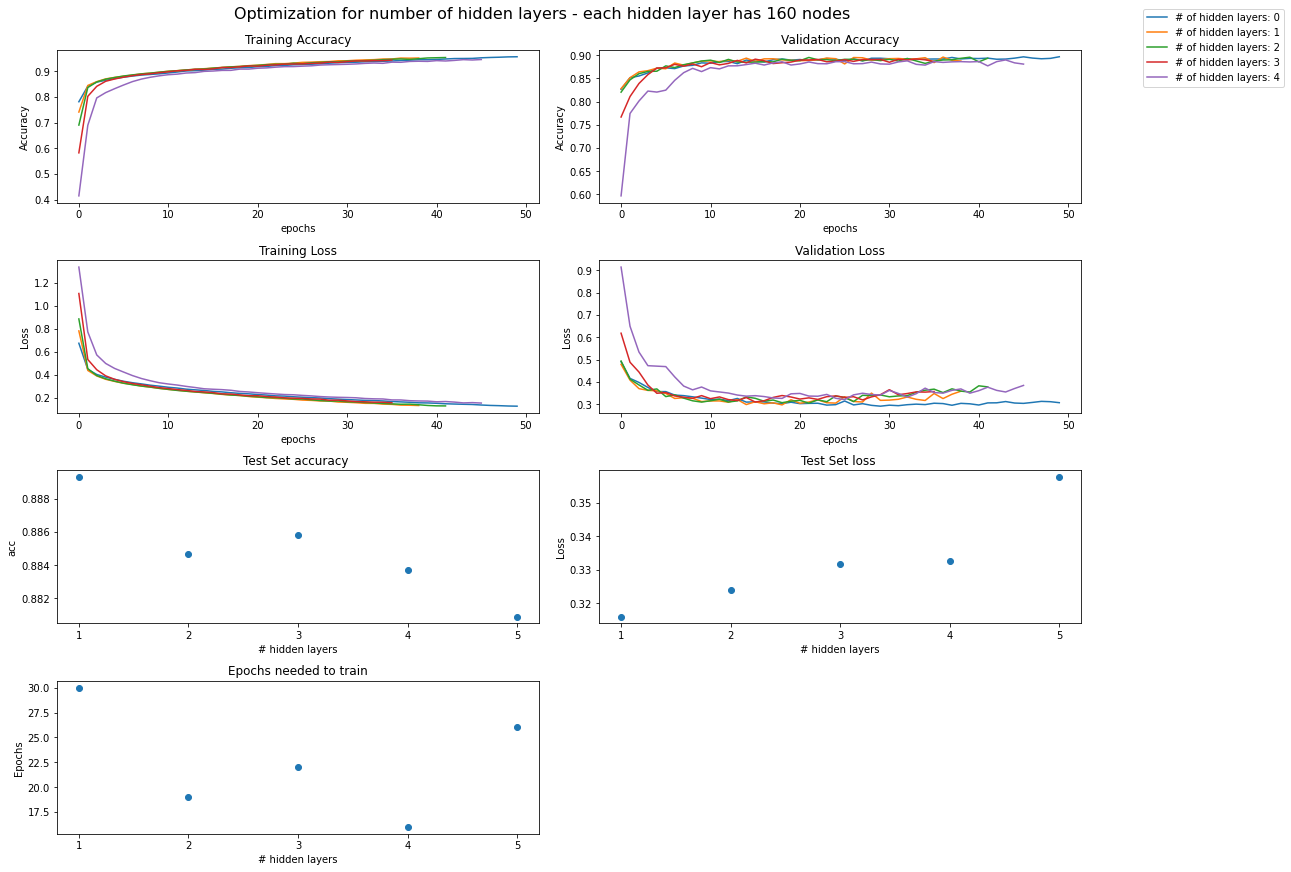

In [71]:
nepochs_arr = np.zeros(npoints)
fig, axs = plt.subplots(4, 2,figsize=(15,12), constrained_layout = True)
# fig.tight_layout()
xlabelarr = [1,2,3,4,5]
# axs[0, 0].plot(x, y)
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Validation Accuracy')
axs[1, 0].set_title('Training Loss')
axs[1, 1].set_title('Validation Loss')
axs[2, 0].set_title('Test Set accuracy ')
axs[2, 1].set_title('Test Set loss ')
axs[3,0].set_title('Epochs needed to train')
a = np.arange(npoints)
for i in range(npoints):
#     lr = LR_array[i]
    key = str(N_MoreHL_Arr[i])
    Array1 = d_layers["train_acc_arr"][key]
    Array2 = d_layers["val_acc_arr"][key]
    Array3 = d_layers["train_loss_arr"][key]
    Array4 = d_layers["val_loss_arr"][key]
    nepochs_trained = len(Array1)
    nepochs_arr[i] = nepochs_trained - 20;
    axs[0, 0].plot(Array1 )
    axs[0, 1].plot(Array2)
    axs[1,0].plot(Array3)
    axs[1,1].plot(Array4, label ='# of hidden layers: '+ key)
    axs[0, 0].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[0, 1].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[1, 0].set(xlabel='epochs', ylabel = 'Loss')
    axs[1, 1].set(xlabel='epochs', ylabel = 'Loss')
axs[2,0].scatter(a, test_acc_opt)
axs[2,1].scatter(a, test_loss_opt)
axs[2, 0].set(xlabel='# hidden layers', ylabel = 'acc')
axs[2, 1].set(xlabel='# hidden layers', ylabel = 'Loss')
axs[2, 1].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 1].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[2, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[3,0].scatter(a, nepochs_arr )
axs[3, 0].set(xlabel='# hidden layers', ylabel = 'Epochs')
axs[3, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[3, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Optimization for number of hidden layers - each hidden layer has 160 nodes ', fontsize=16)
axs[-1, -1].axis('off')
plt.show()

In [72]:
# choose that the number of hidden nodes = 50 
N_MoreHL_Arr = [0,1,2,3,4] # These are in addition to the one original hidden layer  so first index corresponds to 1 layer, 2 layers, 3 layers and so on
nh  = 30 ; 
# make a dictionary to store 
npoints = len(N_MoreHL_Arr)
# I think the best way to store the results would be in a dictionary
d_layers = defaultdict(lambda: "Not Present") 
d_layers["train_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["train_loss_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_loss_arr"] = defaultdict(lambda: "Not Present")
# make accuracy and loss list 
test_acc_opt = np.zeros(npoints)
test_loss_opt = np.zeros(npoints)
## for each idex in that array 
for nlayers in N_MoreHL_Arr: 
    ### Create the network 
    key = str(nlayers)
    print('number of hidden layers = '+str(nlayers+1))
    SavePath = 'keras_'+ str(nlayers+1)+'_HL_' + str(nh)+'_HN.h5'
    net = MLP_Create(nh,   nh, nlayers )
    ### Fit 
    History = Fit_network(network = net,SavePath = SavePath,verbose = 0)
    d_layers["train_acc_arr"][key] = History.history['acc']
    d_layers["train_loss_arr"][key]  = History.history['loss']
    d_layers["val_acc_arr"][key] = History.history['val_acc']
    d_layers["val_loss_arr"][key] = History.history['val_loss']
    # test the network on the testing data
    trained_network = load_model(SavePath)
    # Use the testing data 
    test_loss, test_acc = trained_network.evaluate(XTest,YTest_oneHot)
    # save the accuracy and the loss 
    test_acc_opt[nlayers] = test_acc
    test_loss_opt[nlayers] = test_loss
    

number of hidden layers = 1
10000/10000 [==============================] - 1s 94us/sample - loss: 0.3561 - acc: 0.8752
number of hidden layers = 2
10000/10000 [==============================] - 1s 102us/sample - loss: 0.3507 - acc: 0.8774
number of hidden layers = 3
10000/10000 [==============================] - 1s 111us/sample - loss: 0.3580 - acc: 0.8721
number of hidden layers = 4
10000/10000 [==============================] - 1s 114us/sample - loss: 0.3929 - acc: 0.8669
number of hidden layers = 5
10000/10000 [==============================] - 1s 118us/sample - loss: 0.4146 - acc: 0.8584


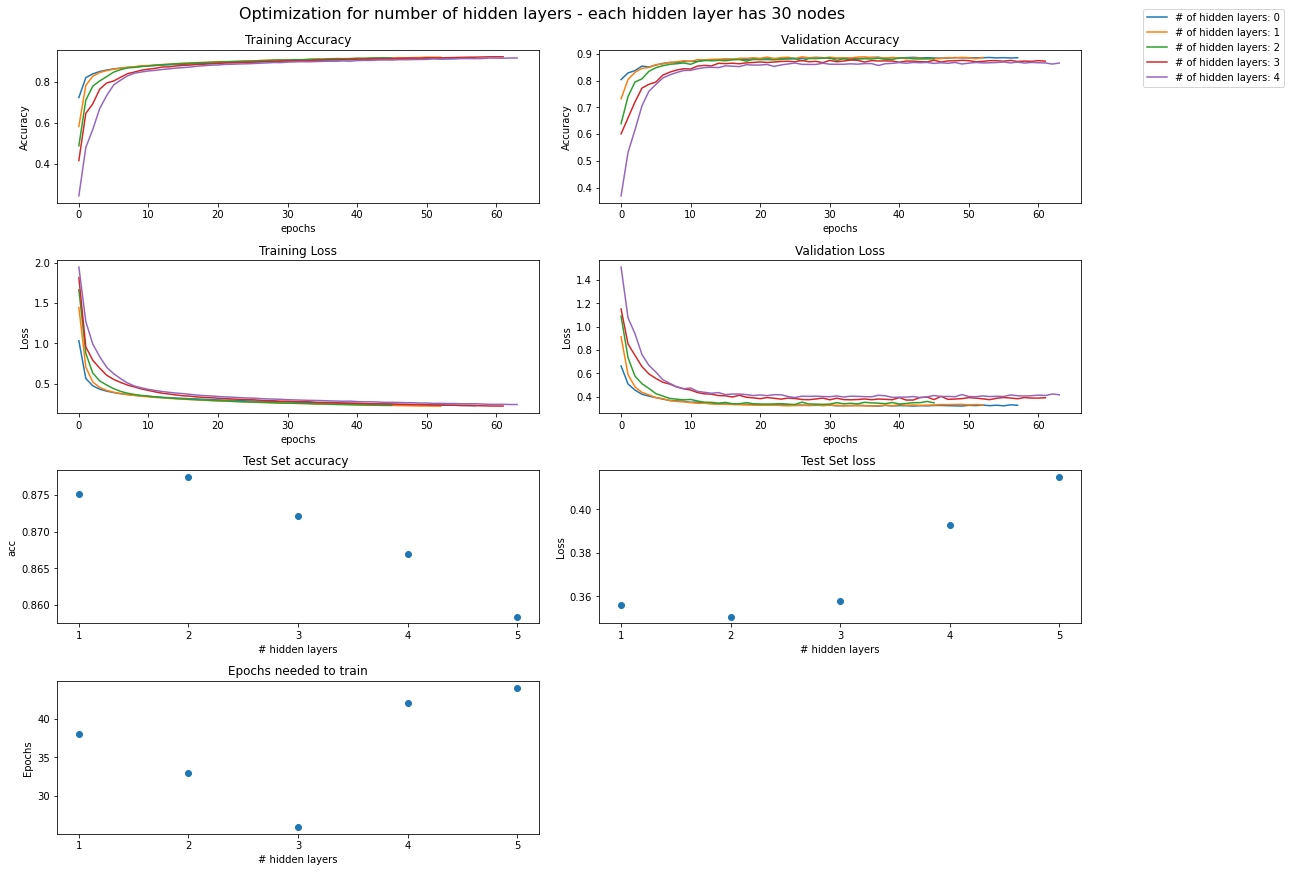

In [73]:
nepochs_arr = np.zeros(npoints)
fig, axs = plt.subplots(4, 2,figsize=(15,12), constrained_layout = True)
# fig.tight_layout()
xlabelarr = [1,2,3,4,5]
# axs[0, 0].plot(x, y)
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Validation Accuracy')
axs[1, 0].set_title('Training Loss')
axs[1, 1].set_title('Validation Loss')
axs[2, 0].set_title('Test Set accuracy ')
axs[2, 1].set_title('Test Set loss ')
axs[3,0].set_title('Epochs needed to train')
a = np.arange(npoints)
for i in range(npoints):
#     lr = LR_array[i]
    key = str(N_MoreHL_Arr[i])
    Array1 = d_layers["train_acc_arr"][key]
    Array2 = d_layers["val_acc_arr"][key]
    Array3 = d_layers["train_loss_arr"][key]
    Array4 = d_layers["val_loss_arr"][key]
    nepochs_trained = len(Array1)
    nepochs_arr[i] = nepochs_trained - 20;
    axs[0, 0].plot(Array1 )
    axs[0, 1].plot(Array2)
    axs[1,0].plot(Array3)
    axs[1,1].plot(Array4, label ='# of hidden layers: '+ key)
    axs[0, 0].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[0, 1].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[1, 0].set(xlabel='epochs', ylabel = 'Loss')
    axs[1, 1].set(xlabel='epochs', ylabel = 'Loss')
axs[2,0].scatter(a, test_acc_opt)
axs[2,1].scatter(a, test_loss_opt)
axs[2, 0].set(xlabel='# hidden layers', ylabel = 'acc')
axs[2, 1].set(xlabel='# hidden layers', ylabel = 'Loss')
axs[2, 1].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 1].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[2, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[3,0].scatter(a, nepochs_arr )
axs[3, 0].set(xlabel='# hidden layers', ylabel = 'Epochs')
axs[3, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[3, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Optimization for number of hidden layers - each hidden layer has 30 nodes ', fontsize=16)
axs[-1, -1].axis('off')
plt.show()

number of hidden layers = 1
10000/10000 [==============================] - 1s 87us/sample - loss: 0.3308 - acc: 0.88180s - loss: 0.3339 - acc: 0.8
number of hidden layers = 2
10000/10000 [==============================] - 1s 101us/sample - loss: 0.3388 - acc: 0.8808
number of hidden layers = 3
10000/10000 [==============================] - 1s 114us/sample - loss: 0.3473 - acc: 0.8790
number of hidden layers = 4
10000/10000 [==============================] - 1s 145us/sample - loss: 0.3652 - acc: 0.8711
number of hidden layers = 5
10000/10000 [==============================] - 1s 140us/sample - loss: 0.3882 - acc: 0.8695


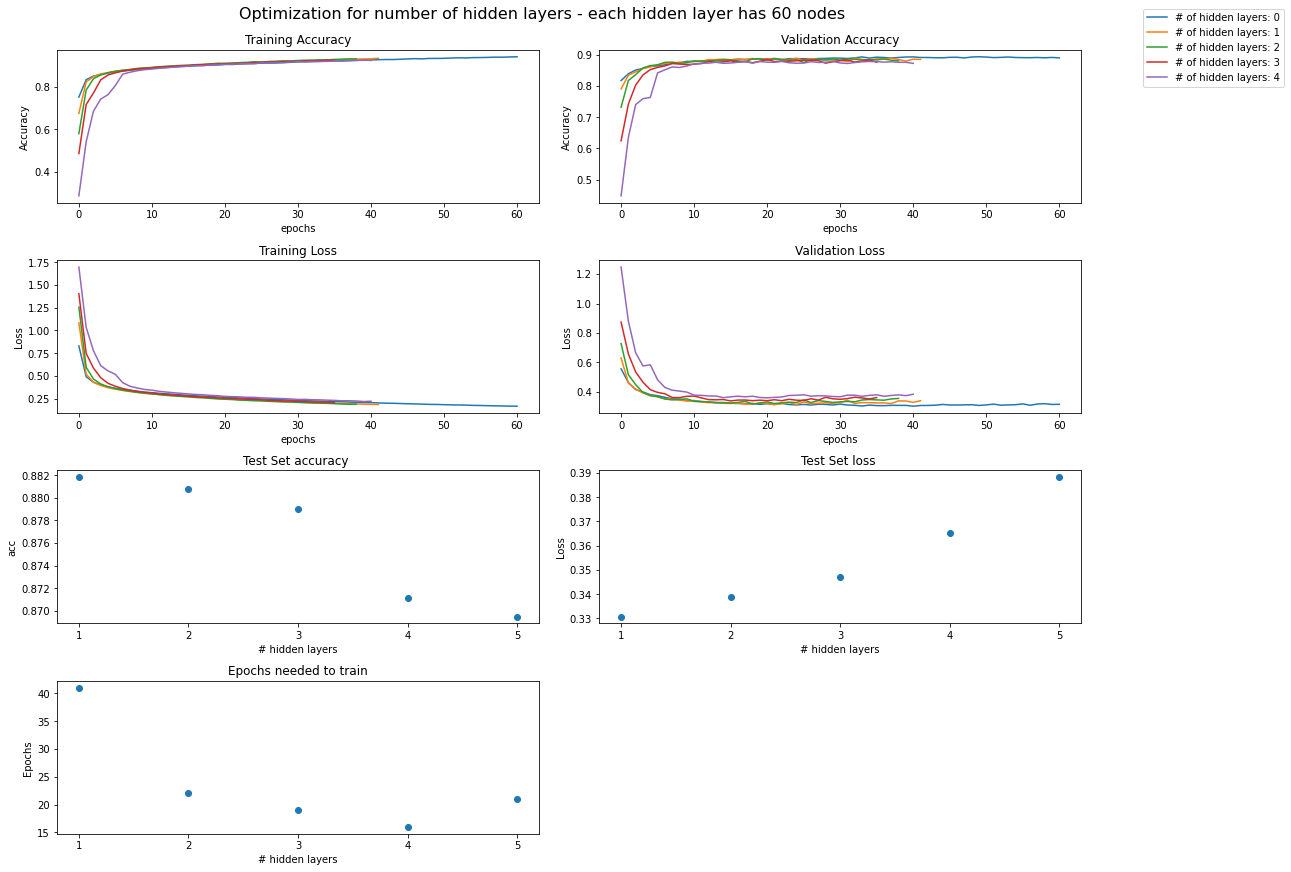

In [74]:
#### it trains so much faster. 
# choose that the number of hidden nodes = 50 
N_MoreHL_Arr = [0,1,2,3,4] # These are in addition to the one original hidden layer  so first index corresponds to 1 layer, 2 layers, 3 layers and so on
nh  = 60 ; 
# make a dictionary to store 
npoints = len(N_MoreHL_Arr)
# I think the best way to store the results would be in a dictionary
d_layers = defaultdict(lambda: "Not Present") 
d_layers["train_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["train_loss_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_acc_arr"] = defaultdict(lambda: "Not Present")
d_layers["val_loss_arr"] = defaultdict(lambda: "Not Present")
# make accuracy and loss list 
test_acc_opt = np.zeros(npoints)
test_loss_opt = np.zeros(npoints)
## for each idex in that array 
for nlayers in N_MoreHL_Arr: 
    ### Create the network 
    key = str(nlayers)
    print('number of hidden layers = '+str(nlayers+1))
    SavePath = 'keras_'+ str(nlayers+1)+'_HL_' + str(nh)+'_HN.h5'
    net = MLP_Create(nh,   nh, nlayers )
    ### Fit 
    History = Fit_network(network = net,SavePath = SavePath,verbose = 0)
    d_layers["train_acc_arr"][key] = History.history['acc']
    d_layers["train_loss_arr"][key]  = History.history['loss']
    d_layers["val_acc_arr"][key] = History.history['val_acc']
    d_layers["val_loss_arr"][key] = History.history['val_loss']
    # test the network on the testing data
    trained_network = load_model(SavePath)
    # Use the testing data 
    test_loss, test_acc = trained_network.evaluate(XTest,YTest_oneHot)
    # save the accuracy and the loss 
    test_acc_opt[nlayers] = test_acc
    test_loss_opt[nlayers] = test_loss
nepochs_arr = np.zeros(npoints)
fig, axs = plt.subplots(4, 2,figsize=(15,12), constrained_layout = True)
# fig.tight_layout()
xlabelarr = [1,2,3,4,5]
# axs[0, 0].plot(x, y)
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Validation Accuracy')
axs[1, 0].set_title('Training Loss')
axs[1, 1].set_title('Validation Loss')
axs[2, 0].set_title('Test Set accuracy ')
axs[2, 1].set_title('Test Set loss ')
axs[3,0].set_title('Epochs needed to train')
a = np.arange(npoints)
for i in range(npoints):
#     lr = LR_array[i]
    key = str(N_MoreHL_Arr[i])
    Array1 = d_layers["train_acc_arr"][key]
    Array2 = d_layers["val_acc_arr"][key]
    Array3 = d_layers["train_loss_arr"][key]
    Array4 = d_layers["val_loss_arr"][key]
    nepochs_trained = len(Array1)
    nepochs_arr[i] = nepochs_trained - 20;
    axs[0, 0].plot(Array1 )
    axs[0, 1].plot(Array2)
    axs[1,0].plot(Array3)
    axs[1,1].plot(Array4, label ='# of hidden layers: '+ key)
    axs[0, 0].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[0, 1].set(xlabel='epochs', ylabel = 'Accuracy')
    axs[1, 0].set(xlabel='epochs', ylabel = 'Loss')
    axs[1, 1].set(xlabel='epochs', ylabel = 'Loss')
axs[2,0].scatter(a, test_acc_opt)
axs[2,1].scatter(a, test_loss_opt)
axs[2, 0].set(xlabel='# hidden layers', ylabel = 'acc')
axs[2, 1].set(xlabel='# hidden layers', ylabel = 'Loss')
axs[2, 1].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 1].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[2, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[2, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
axs[3,0].scatter(a, nepochs_arr )
axs[3, 0].set(xlabel='# hidden layers', ylabel = 'Epochs')
axs[3, 0].xaxis.set_ticks(a) #set the ticks to be a
axs[3, 0].xaxis.set_ticklabels(xlabelarr) # change the ticks' names to x
fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Optimization for number of hidden layers - each hidden layer has 60 nodes ', fontsize=16)
axs[-1, -1].axis('off')
plt.show()

In [75]:
## so 50 and less 2 hidden layers performs better, but greater than 60 and 1 hidden layer perfoms better. 

## Trying Dropout

In [89]:
### TRYING IT OUT 
nhidden1 = 160;   batchnum=128; epochs = 400; StopCriteria  ='val_loss'; optimization = 'adam'; nhidden_in = 160; nHiddenMoreLayers = 4  ; lr=0.001;
net = MLP_Create(nhidden1,DropOut =  True )
net.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 160)               125600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 10)                1610      
Total params: 127,210
Trainable params: 127,210
Non-trainable params: 0
_________________________________________________________________


In [90]:
SavePath = 'keras_dropout_SingleLayer_160Nodes.h5'

History = Fit_network(network = net, SavePath = SavePath,verbose = 0)

In [91]:
trained_network = load_model(SavePath)
    # Use the testing data 
test_loss, test_acc = trained_network.evaluate(XTest,YTest_oneHot)

10000/10000 [==============================] - 2s 198us/sample - loss: 0.3097 - acc: 0.8921


In [92]:
test_acc

0.8921

In [93]:
predictions = trained_network.predict(XTest)
#
# Get the max probabilites for each rows
# probs = np.max(predictions, axis = 1)
#
# Get the predicted classes for each row  - I have plus 1 because this 
# Y_Predicted_classes = np.argmax(predictions, axis = 1) +1
predictions.shape


(10000, 10)

In [94]:
test_labels.shape

(10000, 1)

In [95]:
Y_Predicted_classes = np.argmax(predictions, axis = 1)

In [96]:
Y_Predicted_classes.shape

(10000,)

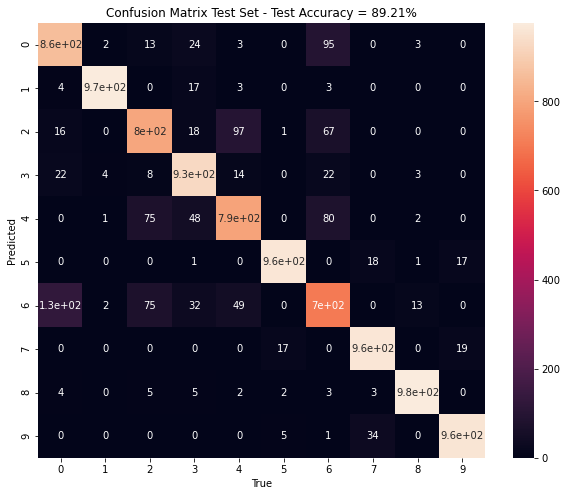

In [99]:

import pandas as pd
from sklearn.metrics import confusion_matrix
ConfMat = confusion_matrix(test_labels, Y_Predicted_classes)
import seaborn as sns
confMat = np.transpose(ConfMat)
df_cm = pd.DataFrame(ConfMat)
plt.figure(figsize = (10,8))
# plt.imshow(ConfMat, cmap = 'hot')
plt.xlabel('Preidcted')
plt.ylabel('true')
ax = sns.heatmap(df_cm, annot=True)
ax.set(title = 'Confusion Matrix Test Set - Test Accuracy = ' + str(round(test_acc *100,3))+ '%', xlabel = 'True', ylabel = 'Predicted')
plt.show()